In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data preparation ---- 

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.shape

(10841, 13)

In [5]:
df["App"][0]

'Photo Editor & Candy Camera & Grid & ScrapBook'

In [6]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9695,EP Mobile,MEDICAL,4.3,267,2.3M,"50,000+",Free,0,Everyone,Medical,"July 8, 2018",2.18,4.0 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up


In [7]:
df.shape

(10841, 13)

In [8]:
df.describe()
#the five point summary

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

483

In [11]:
df=df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
#applying dtype on single col,
df["Content Rating"].dtypes

dtype('O')

In [13]:
df["Reviews"].dtypes 

dtype('O')

In [14]:
df["Reviews"].value_counts()

Reviews
0          593
1          272
2          213
3          170
4          137
          ... 
527247       1
240475       1
5282558      1
654418       1
398307       1
Name: count, Length: 6002, dtype: int64

In [15]:
# reviews col should be numeric col, but here its also a object coloumn
#to find columns data is categorial col from review col..

#example
type("1")
"1".isnumeric() #so here 1 is numeric inside a string 

True

In [16]:
df[~df.Reviews.str.isnumeric()] # way to know string data inside col,out of int datas 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
#reseting the index after droping values original index is their

df.reset_index(drop=True,inplace=True)
df.shape

(10358, 13)

In [18]:
df=df[df.Reviews.str.isnumeric()]
#we drop that str value data from the Reviews col 
df.shape

(10357, 13)

In [19]:
df[~df.Reviews.str.isnumeric()]
#no any col consist of str data type values inside the Reviews col

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
df["Reviews"]=df["Reviews"].astype(int)
#converting data type from objt to int

In [21]:
df.Reviews.dtypes

dtype('int32')

In [22]:
df["Size"].unique()
#now this col consist of mb,kb datas

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
#remocing 1m=1024kb in size col

def size_pros(item):
    if str(item)[-1]=="M":
        res=float(str(item).replace("M",""))
        res=res*1024
        return res
        
    elif str(item)[-1]=="K":
        res=float(str(item).replace("K",""))
        return res
        
    else:
        return str(np.NaN)

size_pros("1M")

1024.0

In [24]:
df["Size"]=df["Size"].apply(size_pros)


In [25]:
df["Size"].unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 3686.4, 5836.8, 8806.4, 2457.6, 27648.0,
       2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0, 32768.0,
       5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0, 9216.0,
       6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6, 6553.6,
       3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6, 13312.0,
       74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4, 43008.0,
       7475.2, 9318.4, 56320.0, 6656.0, 1536.0, 7680.0, 52224.0, 41984.0,
       49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8, 3379.2, 40960.0,
       7987.2, 9011.2, 6758.4, 5222.4, 62464.0, 6758

In [26]:
df["Size"]=df["Size"].astype(float)
df["Size"].dtype

dtype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8516 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [28]:
#now working with Install col

df["Installs"]=df["Installs"].str.replace("+","").str.replace(",","")
df["Installs"]=df["Installs"].astype(int)
df["Installs"].dtype

dtype('int32')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8516 non-null   float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.0+ MB


In [30]:
df["Price"].unique()
# due to $ sign its a object column

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [31]:
df["Price"]=df["Price"].str.replace("$","")
df["Price"]=df["Price"].astype(float)

In [32]:
df["Price"].dtype
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [33]:
#now working with  last updated col 

df["Last Updated"].unique()
#this data  show date and time.

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [34]:
#converting the last updated col into datatime format
df["Last Updated"]=pd.to_datetime(df["Last Updated"])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [35]:
#accessing the day data from the Last updates col after convertin it into datatime format

df["day"]=df["Last Updated"].dt.day
df["month"]=df["Last Updated"].dt.month
df["year"]=df["Last Updated"].dt.year # years data
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int32         
 4   Size            8516 non-null   float64       
 5   Installs        10357 non-null  int32         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
 13  day             10357 non-null  int32         
 14  month           10357 non-null  int32         
 15  year   

In [37]:
# as we extract all the data from the last day col, we droping it 
df.drop("Last Updated",axis=1,inplace=True)

In [38]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [39]:
# now workinng with the android version col
df["Android Ver"]

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10353            4.1 and up
10354            4.1 and up
10355            2.2 and up
10356    Varies with device
10357    Varies with device
Name: Android Ver, Length: 10357, dtype: object

In [40]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [41]:
df["Android Ver"]=df["Android Ver"].str.replace("and up","").str.replace("Varies with device","")
df["Android Ver"]=df["Android Ver"].str.replace("W"," ")
df["Android Ver"]=df["Android Ver"].str.replace("-"," ")

In [94]:
df["Android Ver"]=df['Android Ver'].str.split('.').str[0] + '.' + df['Android Ver'].str.split('.').str[1]
df["Android Ver"]

0         4.0
1         4.0
2         4.0
3        4.2 
4        4.4 
         ... 
10353    4.1 
10354    4.1 
10355    2.2 
10356     NaN
10357     NaN
Name: Android Ver, Length: 10357, dtype: object

In [108]:
#now working with the app col
df["App"]

df[df["App"].duplicated()] #as it show 698 cols of dada are duplicated we drop

df=df.drop_duplicates(subset=["App"],keep="first")

In [114]:
df[df["App"].duplicated()] #no more dublicate values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year


In [116]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,NaN,19,1,2015


# EDA OF THE ABOVE DATA SET

In [126]:
#getting out the thoes columns data which are object from the dataset
categoriacal_feature=[feature for feature in df.columns if df[feature].dtype=="O"]
categoriacal_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [128]:
#getting the numerical data col from the data set
numerical_feature=[feature for feature in df.columns if df[feature].dtype!="O"]
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

In [130]:
df[categoriacal_feature] 

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10355,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,NaN


In [ ]:
#for categorical data we use frequency plot,barchart,pie charts
#for numerical data we use displot,linechart,pairplot,scatterplots etc

# Categorical feature analysis 

In [136]:
df["Type"].value_counts()

Type
Free    8902
Paid     756
Name: count, dtype: int64

In [138]:
df["Type"].value_counts(normalize=True) #in percentage format 

Type
Free    0.921723
Paid    0.078277
Name: proportion, dtype: float64

In [144]:
for col in categoriacal_feature:
   print(f"{col}: {df[col].value_counts(normalize=True)*100}")
   

App: App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category: Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE     

In [146]:
df["Type"].value_counts(normalize=True)*100

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64

<Axes: xlabel='Type', ylabel='count'>

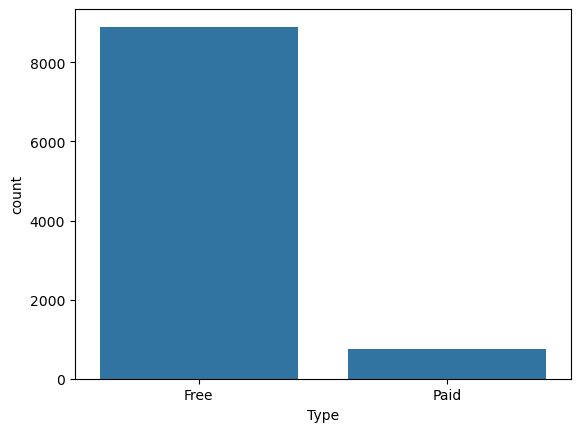

In [150]:
sns.countplot(x=df["Type"])

<Axes: xlabel='Content Rating', ylabel='count'>

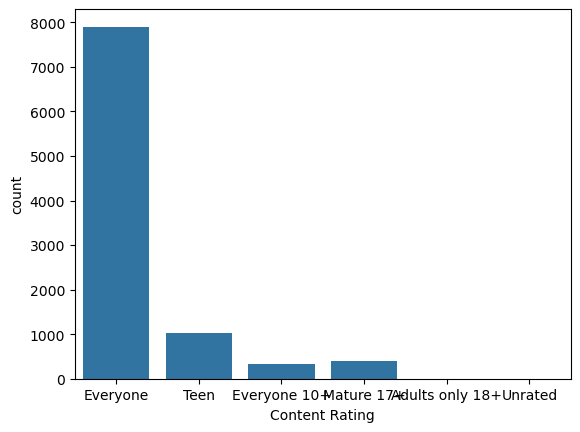

In [152]:
sns.countplot(x=df["Content Rating"])

# Numerical feature

<Axes: xlabel='Price', ylabel='Density'>

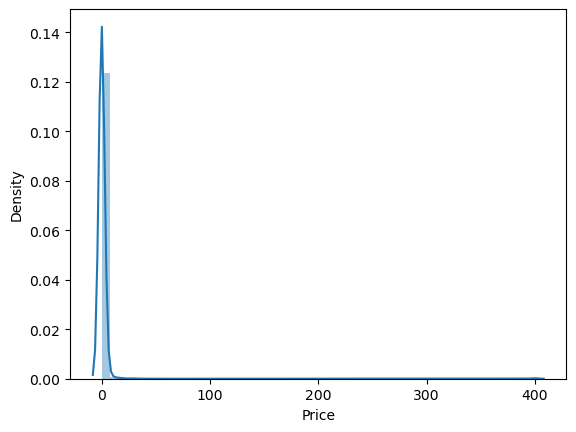

In [157]:
sns.distplot(df["Price"],kde=True)

<Axes: xlabel='Rating', ylabel='Density'>

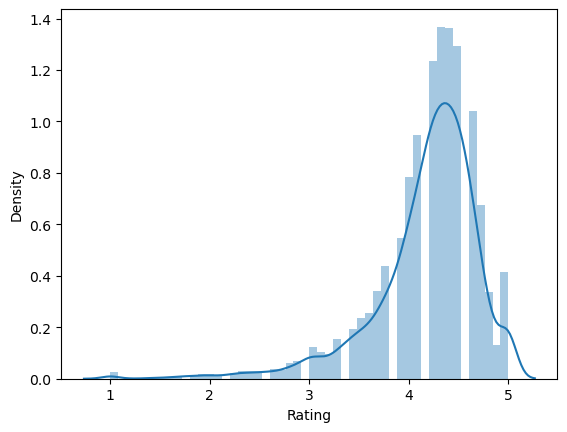

In [159]:
sns.distplot(df["Rating"],kde=True)

<Axes: xlabel='Rating', ylabel='Density'>

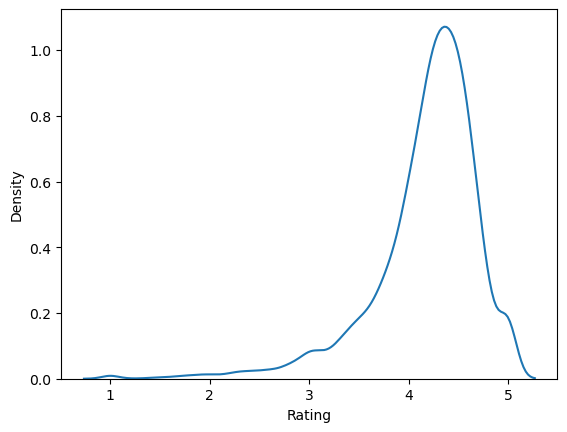

In [161]:
sns.kdeplot(df["Rating"])

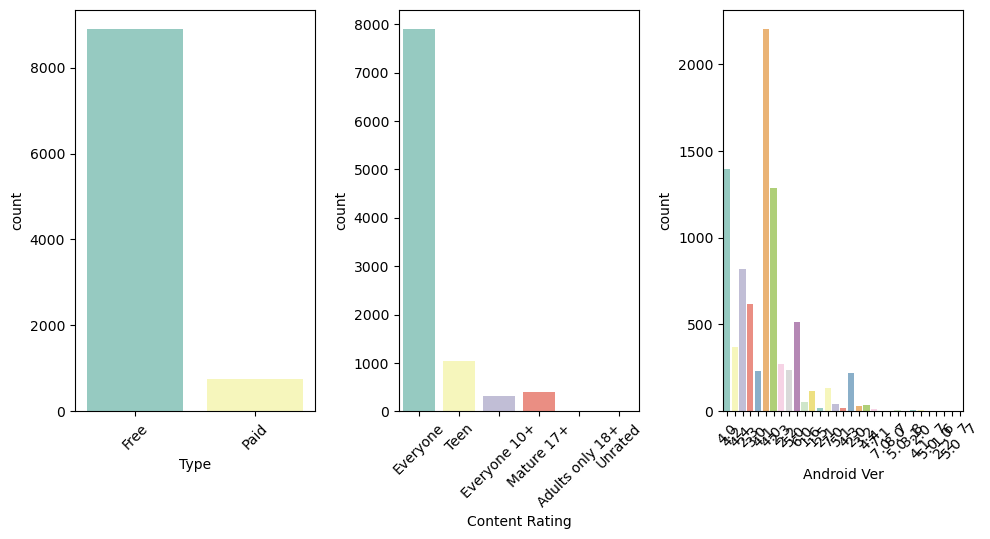

In [183]:
plt.figure(figsize=(10,15))
categories=["Type","Content Rating","Android Ver"]
for i in range(0,len(categories)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categories[i]],palette="Set3")
    plt.xlabel(categories[i])
    plt.xticks(rotation=45)
    plt.tight_layout() #plot will be close to each other 

In [185]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,NaN,19,1,2015


<Axes: ylabel='count'>

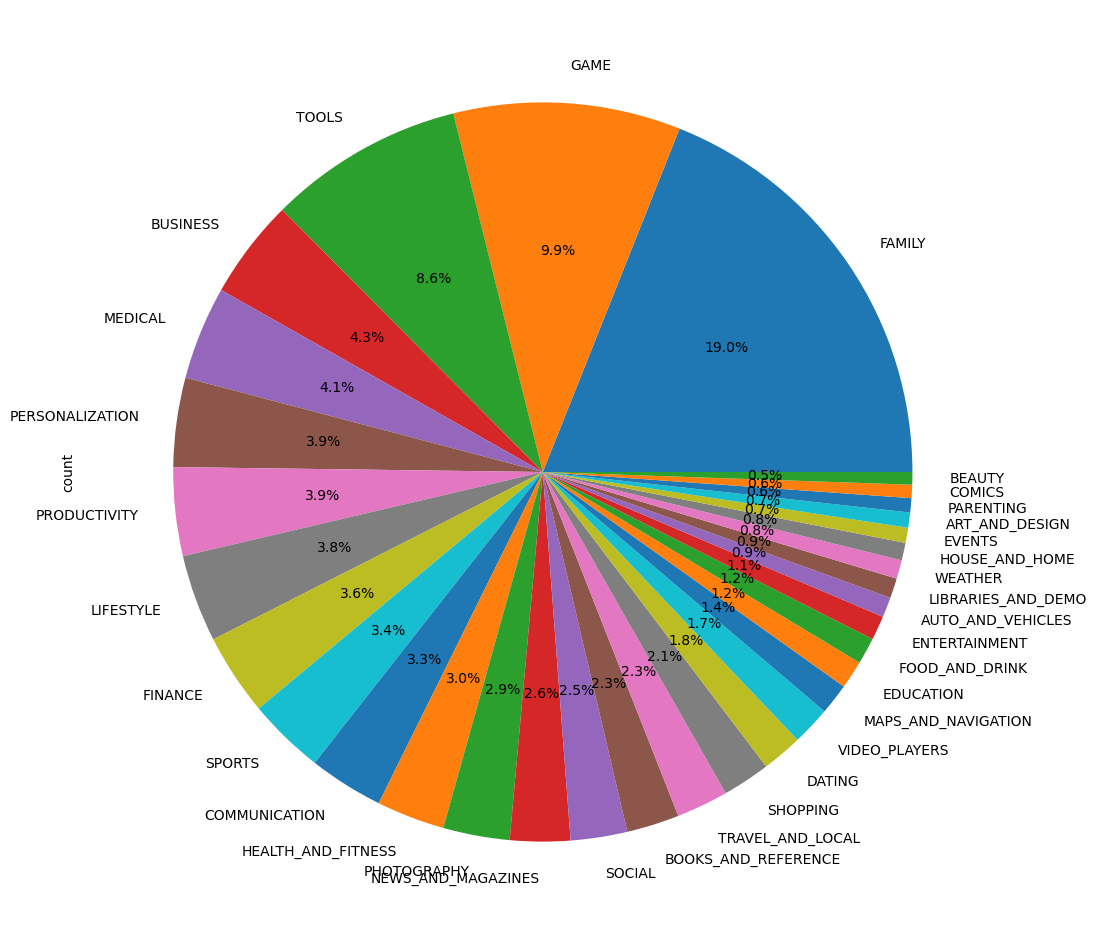

In [195]:
# which category is the most popular category in the app 

df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(12,12),autopct="%1.1f%%")

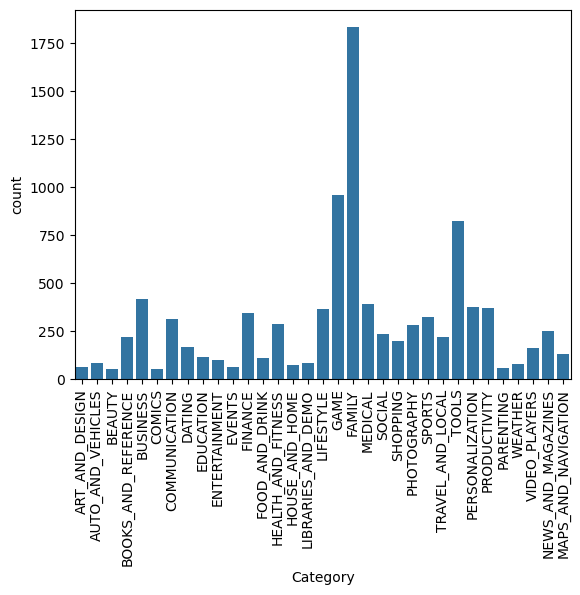

In [203]:
sns.countplot(x=df["Category"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#most popular category is family with 19% share 


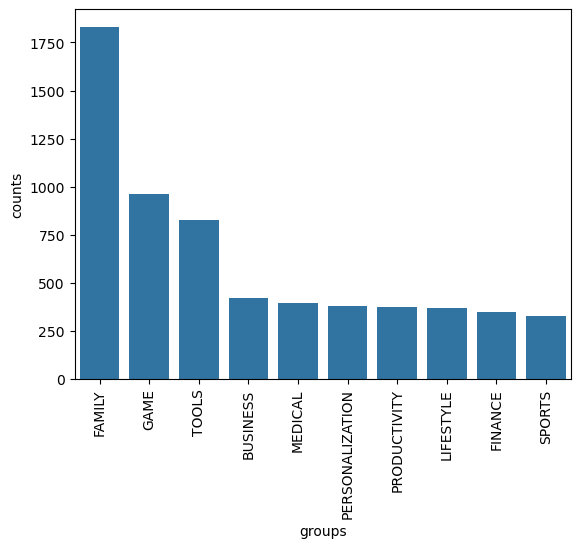

In [221]:
#Q. top 10 most popular categories?
cat=df["Category"].value_counts()[:10]
cat

category=cat.reset_index()
category.columns=["groups","counts"]
category

sns.barplot(x=category["groups"],y=category["counts"])
plt.xticks(rotation=90)
plt.show()

In [223]:
#q) which category has the highest istalation?


In [231]:
df.groupby(["Category"])["Installs"].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

In [239]:

#QS. which category app user reviewing the most?
df.groupby(["Category","App"])["Reviews"].sum().sort_values(ascending=False)

Category             App                                     
SOCIAL               Facebook                                    78158306
COMMUNICATION        WhatsApp Messenger                          69119316
SOCIAL               Instagram                                   66577313
COMMUNICATION        Messenger – Text and Video Chat for Free    56642847
GAME                 Clash of Clans                              44891723
                                                                   ...   
LIFESTYLE            DT                                                 0
TOOLS                AQ SMS Notify                                      0
                     AQ wisdom +                                        0
BOOKS_AND_REFERENCE  Schlaumeier                                        0
MEDICAL              POCKET BOOK CT ABDOMEN                             0
Name: Reviews, Length: 9659, dtype: int32

In [249]:
#qs> what are top 5 installed category apps in each type?

df.groupby(["Category","Type"])["Installs"].sum().sort_values(ascending=False)

Category            Type
GAME                Free    13857924450
COMMUNICATION       Free    11036916201
TOOLS               Free     8000044474
PRODUCTIVITY        Free     5791679314
SOCIAL              Free     5487861902
                               ...     
SHOPPING            Paid          10100
SOCIAL              Paid           6000
NEWS_AND_MAGAZINES  Paid           5500
LIBRARIES_AND_DEMO  Paid            100
EVENTS              Paid              1
Name: Installs, Length: 63, dtype: int64